In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show, savefig)
import numpy as np

In [2]:
df = pd.read_csv('hour.csv')

In [3]:
# PREPROCESSING

# Removing useless attributes
df = df.drop('dteday', axis=1)
df = df.drop('instant', axis=1)
df = df.drop('yr', axis=1)

# Applying sqrt to "cnt" (to make it a continuous variable)
df['cnt'] = np.sqrt(df['cnt'])

# Removing deprecated attributes after the sqrt transformation (cnt = casual + registered)
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,4.000000
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,6.324555
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.656854
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.605551
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.000000


In [4]:
# Format data like exercises
X = df.drop(columns=['cnt']).values
N, M = X.shape
y = df['cnt'].values
attributeNames = df.columns.drop('cnt').tolist()

In [5]:
# apply a feature transformation to your data matrix x such that each column has mean 0 and standard deviation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
df = pd.DataFrame(X, columns=attributeNames)

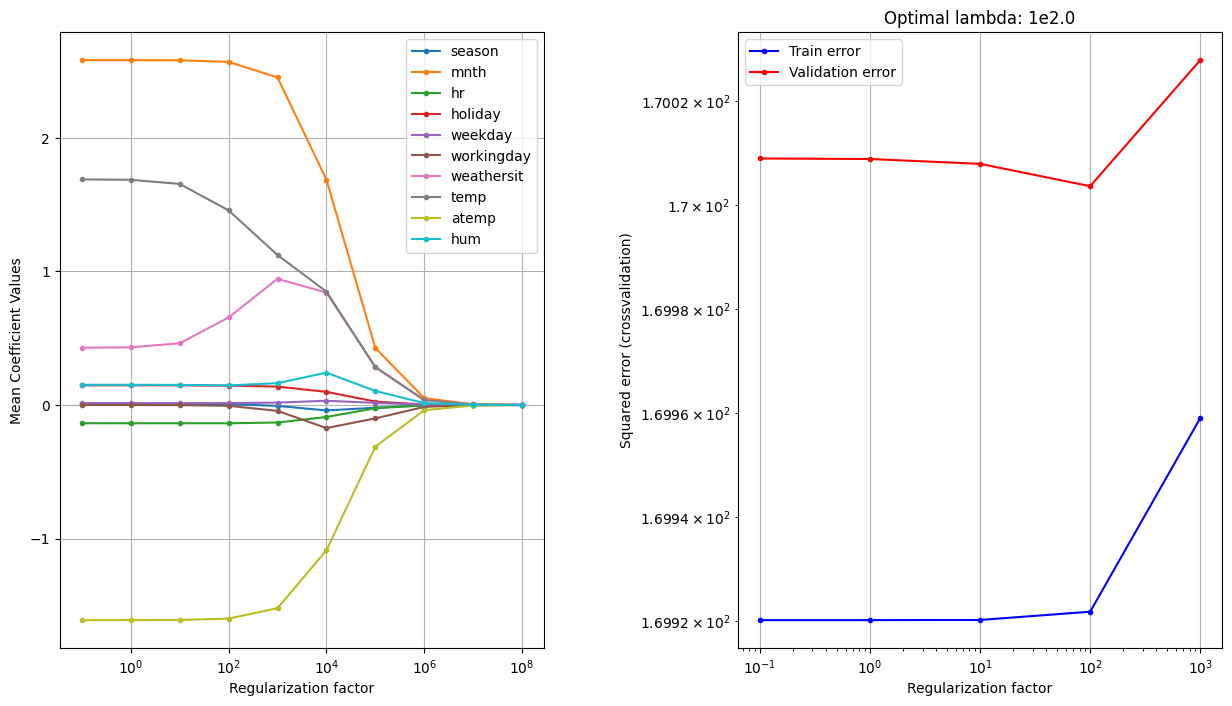

In [44]:
from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid)
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import rlr_validate


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=True)

# Values of lambda
lambdas = np.power(10.,range(-1,9))

# get optimal lambda and errors
opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X, y, lambdas, K)

# Display the results for the last cross-validation fold
figure(figsize=(15,8))
subplot(1,2,1)
semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
xlabel('Regularization factor')
ylabel('Mean Coefficient Values')
grid()
# You can choose to display the legend, but it's omitted for a cleaner 
# plot, since there are many attributes
legend(attributeNames, loc='best')

plt.subplots_adjust(wspace=0.4, hspace=1.4)  # You can adjust the values for more or less space

subplot(1,2,2)
title('Optimal lambda: 1e{0}'.format(np.log10(opt_lambda)))
# plotting in range -1,4 for optimal visualization
loglog(lambdas[:5],train_err_vs_lambda.T[:5],'b.-',lambdas[:5],test_err_vs_lambda.T[:5],'r.-')
xlabel('Regularization factor')
ylabel('Squared error (crossvalidation)')
legend(['Train error','Validation error'])
grid()
savefig('res/plots/lambda.png')

<Figure size 640x480 with 0 Axes>